
## EXERCÍCIO 01: 


In [85]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando um estilo visual mais agradável para os gráficos
sns.set_theme(style="whitegrid")

# Carregando o dataset a partir do arquivo CSV
# Certifique-se de que o arquivo está no diretório correto
try:
    df = pd.read_csv('../arquivos/WA_Fn-UseC_-HR-Employee-Attrition.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'WA_Fn-UseC_-HR-Employee-Attrition.csv' não encontrado.")
    print("Por favor, faça o download do dataset do Kaggle e coloque-o na mesma pasta do seu script.")
    df = pd.DataFrame()
    
if not df.empty:
    # Exibindo as 5 primeiras linhas para ter uma primeira impressão dos dados
    print("As 5 primeiras linhas do dataset:")
    display(df.head())

As 5 primeiras linhas do dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# CÉLULA 02: INSPEÇÃO DO CONJUNTO DE DADOS


In [86]:
if not df.empty:
    # Verificando as dimensões do dataset (linhas, colunas)
    print(f"O dataset possui {df.shape[0]} linhas (funcionários) e {df.shape[1]} colunas (características).\n")

    # Obtendo um resumo conciso do DataFrame, incluindo tipos de dados e valores não nulos
    print("Informações sobre os tipos de dados e valores nulos:")
    df.info()

    # Apresentando um resumo estatístico das colunas numéricas
    print("\nResumo estatístico das variáveis numéricas:")
    display(df.describe())
    
    # Removendo colunas que não agregam valor ao modelo preditivo ; EmployeeCount, EmployeeNumber, Over18(todos são maiores de 18), StandardHours
    # 'Over18' também só tem um valor ('Y'), conforme podemos verificar
    colunas_para_remover = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
    df_limpo = df.drop(columns=colunas_para_remover)

    print(f"\nDataset após remover colunas irrelevantes. Nova dimensão: {df_limpo.shape}")

O dataset possui 1470 linhas (funcionários) e 35 colunas (características).

Informações sobre os tipos de dados e valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  Ho

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Dataset após remover colunas irrelevantes. Nova dimensão: (1470, 31)


Distribuição da variável 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Proporção da variável 'Attrition':
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


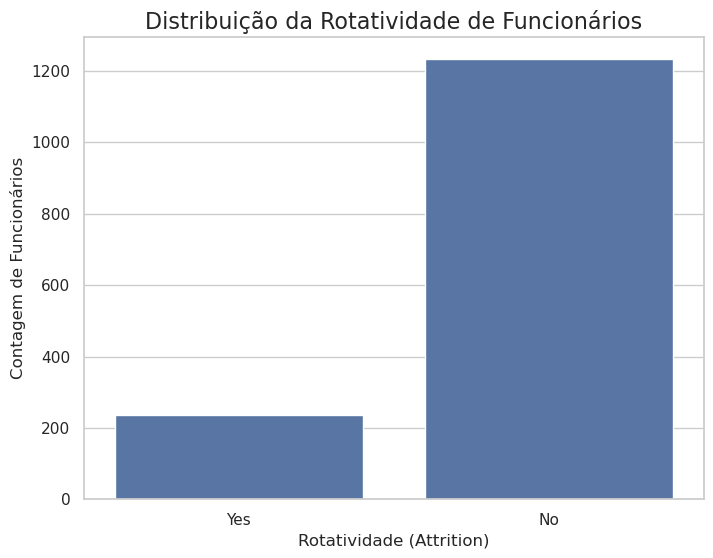

In [87]:
if not df_limpo.empty: 
    # Calculando a contagem e a proporção de cada classe na variável alvo
    print("Distribuição da variável 'Attrition':")
    print(df_limpo['Attrition'].value_counts())
    print("\nProporção da variável 'Attrition':")
    print(df_limpo['Attrition'].value_counts(normalize=True) * 100)

    # Visualizando a distribuição
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Attrition', data=df_limpo)
    plt.title('Distribuição da Rotatividade de Funcionários', fontsize=16)
    plt.xlabel('Rotatividade (Attrition)')
    plt.ylabel('Contagem de Funcionários')
    plt.show()
    
    # O resultado mostra que 83,9% das pessoas não saíram da empresa, apenas 16,1% saíram, logo a métrica acurácia não será importante, pois se um modelo chutar
    # todas as vezes que um funcionário não sairá da empresa, ele ainda acertará 84 vezes a cada 100.

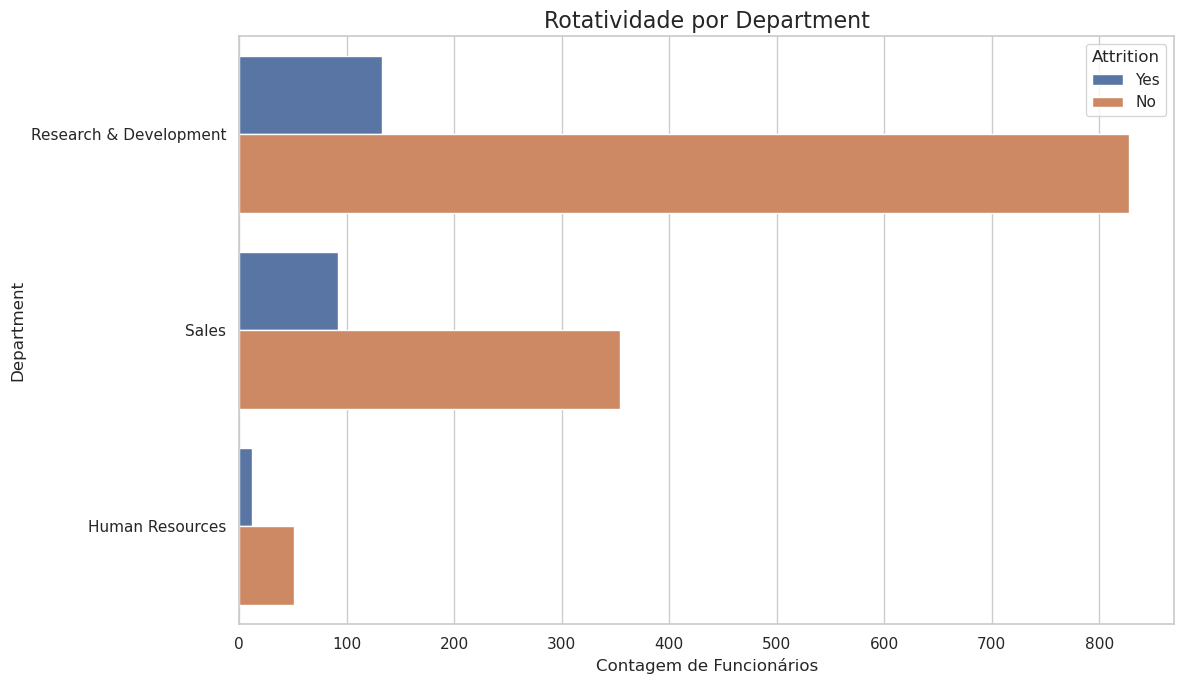

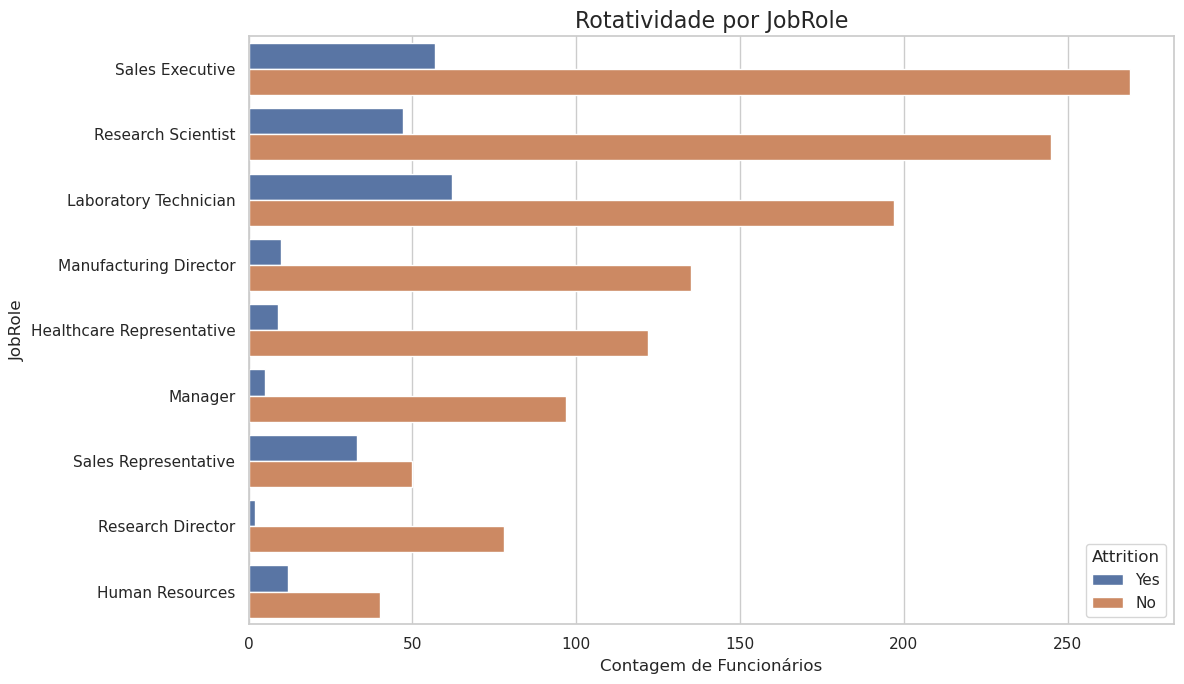

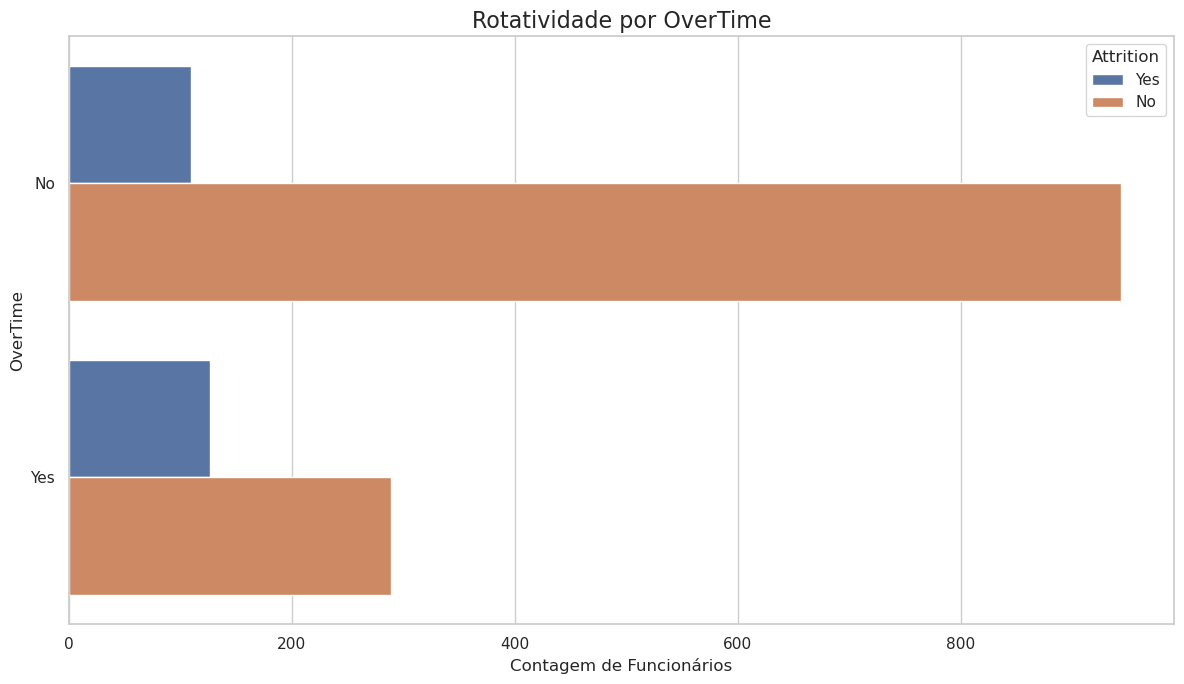

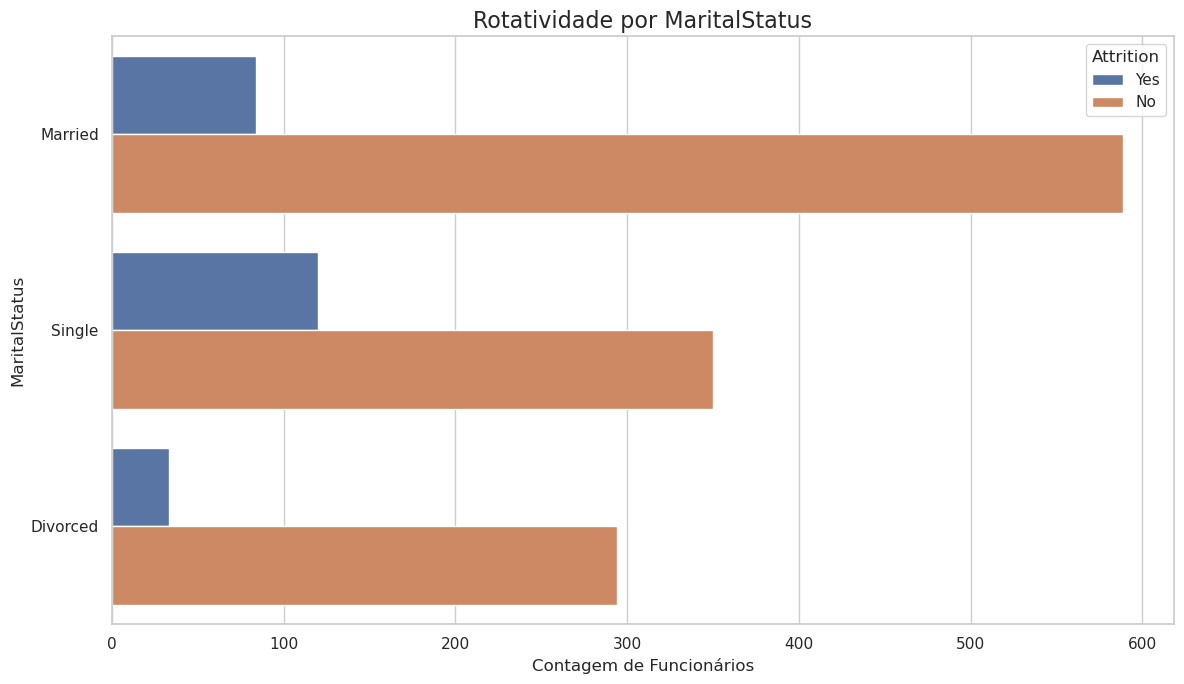

In [88]:
if not df_limpo.empty:
    # Selecionando algumas variáveis categóricas para análise
    features_categoricas = ['Department', 'JobRole', 'OverTime', 'MaritalStatus']

    # Criando gráficos para cada variável
    for feature in features_categoricas:
        plt.figure(figsize=(12, 7))
        sns.countplot(data=df_limpo, y=feature, hue='Attrition', order=df_limpo[feature].value_counts().index)
        plt.title(f'Rotatividade por {feature}', fontsize=16)
        plt.xlabel('Contagem de Funcionários')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()

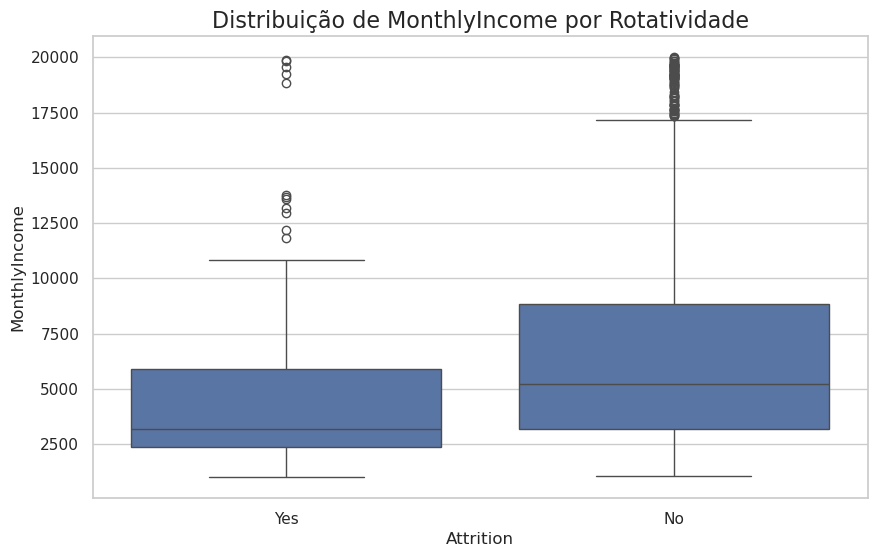

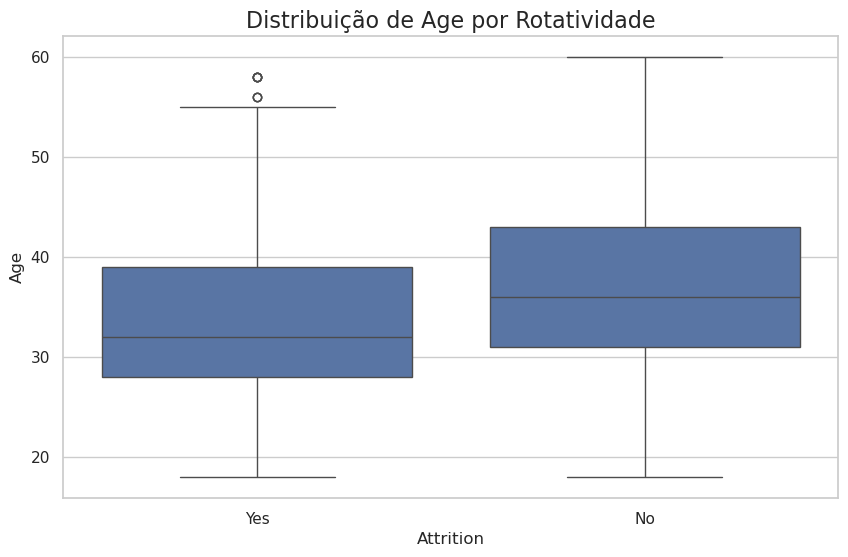

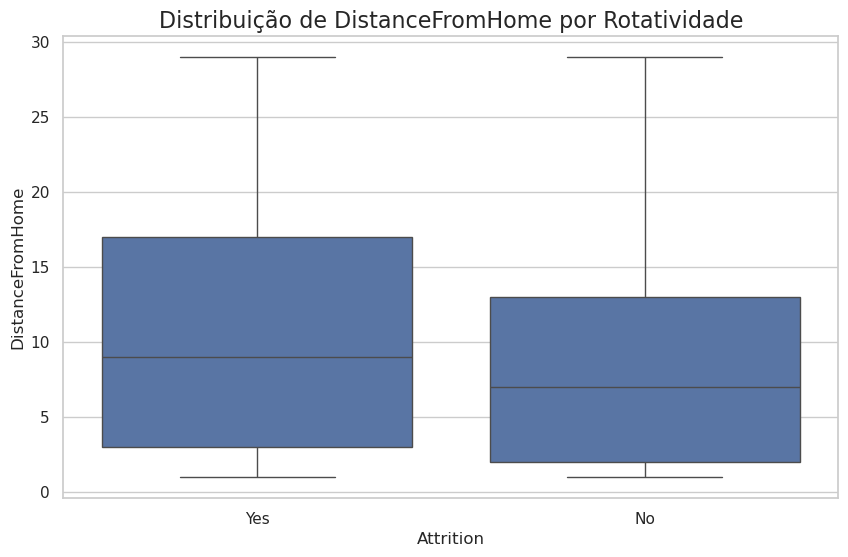

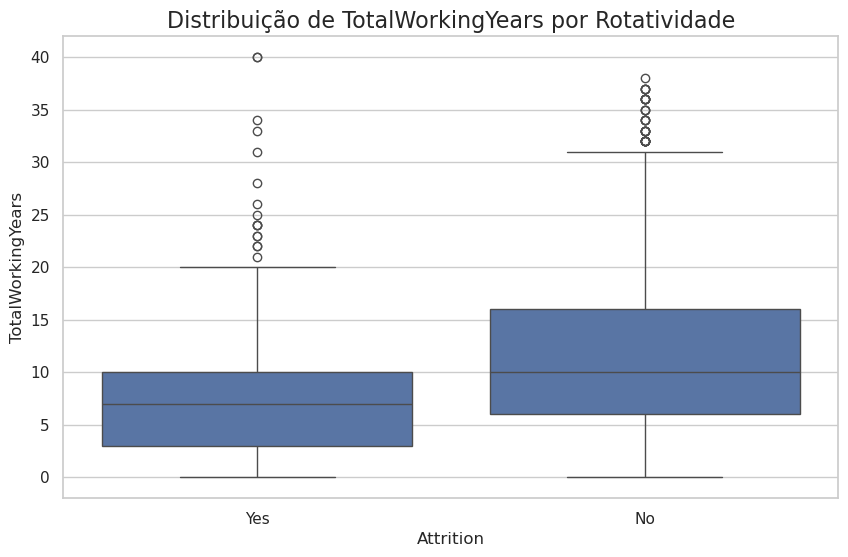

In [89]:
if not df_limpo.empty:
    # Selecionando algumas variáveis numéricas importantes
    features_numericas = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears']
    
    # Mapeando Attrition para 0 e 1 para facilitar algumas visualizações
    df_limpo['Attrition_numeric'] = df_limpo['Attrition'].map({'Yes': 1, 'No': 0})


    for feature in features_numericas:
        plt.figure(figsize=(10, 6))
        # Usando um boxplot para comparar as distribuições
        sns.boxplot(x='Attrition', y=feature, data=df_limpo)
        plt.title(f'Distribuição de {feature} por Rotatividade', fontsize=16)
        plt.show()

# Pré-processamento

In [90]:
# Não há necessidade de fazer essa etapa, pois não há valores faltantes.
# Mas o código é assim
if not df_limpo.empty:
    print("Verificação de valores faltantes em cada coluna:")
    print(df_limpo.isnull().sum())
    
    # Confirmação
    if df_limpo.isnull().sum().sum() == 0:
        print("\nConfirmação: Não há valores faltantes no dataset. Nenhuma ação de imputação é necessária.")
    else:
        print("\nAlerta: Valores faltantes foram encontrados. Seria necessário aplicar uma estratégia de tratamento.")
    
    # Caso houvesse valores faltantes, seria necessário aplicar uma estratégia na qual, para variáveis numéricas
    # os valores faltantes poderiam ser preenchidos com os valores da mediana ou para variáveis 
    # categóricas, poderia ser preenchido com o valor da moda.

Verificação de valores faltantes em cada coluna:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition_numeric    

In [91]:
if not df_limpo.empty:
    # Criando uma cópia para evitar warnings sobre alteração de dados originais
    df_proc = df_limpo.copy()

    # 1. Transformar a variável alvo 'Attrition'
    # Mapearemos 'Yes' para 1 e 'No' para 0.
    df_proc['Attrition'] = df_proc['Attrition'].map({'Yes': 1, 'No': 0})
    
    print("Variável 'Attrition' após transformação:")
    print(df_proc['Attrition'].value_counts())
    print("-" * 40)

Variável 'Attrition' após transformação:
Attrition
0    1233
1     237
Name: count, dtype: int64
----------------------------------------


In [92]:
if not df_proc.empty:
    # 2. Transformar as variáveis preditoras (features) categóricas
    
    # Identificando as colunas categóricas restantes
    features_categoricas = df_proc.select_dtypes(include=['object']).columns
    print(f"Features categóricas a serem transformadas: {list(features_categoricas)}\n")
    
    # Aplicando a dummificação com pandas
    df_final = pd.get_dummies(df_proc, columns=features_categoricas, drop_first=True)
    
    print("Dimensões do dataset após a dummificação:", df_final.shape)
    print("\nVisualização das primeiras linhas do dataset final processado:")
    display(df_final.head())

Features categóricas a serem transformadas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Dimensões do dataset após a dummificação: (1470, 46)

Visualização das primeiras linhas do dataset final processado:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [93]:
if not df.empty:    
    y = df_final['Attrition']
    colunas_para_remover = ['Attrition']
    if 'Attrition_numeric' in df_final.columns:
        colunas_para_remover.append('Attrition_numeric')
        
    X = df_final.drop(columns=colunas_para_remover)
    
    
    print("--- Variáveis X e y definidas com sucesso ---")
    print("Formato de X:", X.shape)
    print("Formato de y:", y.shape)
    print("-" * 40)

--- Variáveis X e y definidas com sucesso ---
Formato de X: (1470, 44)
Formato de y: (1470,)
----------------------------------------


## Treinamento do modelo

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

if 'X' in locals() and 'y' in locals():
    
    X_train, X_test, y_train, y_test = train_test_split (
        X, y,
        test_size=0.3, # 30% teste 70% treino
        stratify=y,     # Garante que a divisão dos dados mantenham a mesma proporção de classes no treino e teste
        random_state=42
    )
    print("Formato dos dados de treino (X_train, y_train):")
    print(X_train.shape, y_train.shape)
    
    print("\nFormato dos dados de teste (X_test, y_test):")
    print(X_test.shape, y_test.shape)

    print("\nProporção de 'Attrition' no conjunto de treino (y_train):")
    print(y_train.value_counts(normalize=True) * 100)
    
    print("\nProporção de 'Attrition' no conjunto de teste (y_test):")
    print(y_test.value_counts(normalize=True) * 100)

else:
    print("Erro: As variáveis X e y não foram definidas na etapa anterior.")
    # Criando variáveis dummy para o código não quebrar, mas informando o usuário
    X_train, X_test, y_train, y_test = (pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series())
    

Formato dos dados de treino (X_train, y_train):
(1029, 44) (1029,)

Formato dos dados de teste (X_test, y_test):
(441, 44) (441,)

Proporção de 'Attrition' no conjunto de treino (y_train):
Attrition
0    83.867833
1    16.132167
Name: proportion, dtype: float64

Proporção de 'Attrition' no conjunto de teste (y_test):
Attrition
0    83.900227
1    16.099773
Name: proportion, dtype: float64


In [95]:
if not X_train.empty:
    # 1. Instanciando o modelo
    model_nb = GaussianNB()

    # 2. Treinando o modelo
    model_nb.fit(X_train, y_train)

    print("\nModelo Gaussian Naive Bayes treinado com sucesso!")
    print(model_nb)

else:
    print("\nTreinamento não pode ser realizado pois os dados de treino estão vazios.")


Modelo Gaussian Naive Bayes treinado com sucesso!
GaussianNB()


# Avaliação: Cálculo das métricas e apresentação da matriz de confusão

--- Métricas de Avaliação do Modelo Naive Bayes ---
Acurácia (Accuracy):   72.11%
Precisão (Precision): 31.16%
Recall (Revocação): 60.56%
F1-Score:             41.15%

--- Relatório de Classificação Completo ---


              precision    recall  f1-score   support

   Ficou (0)       0.91      0.74      0.82       370
    Saiu (1)       0.31      0.61      0.41        71

    accuracy                           0.72       441
   macro avg       0.61      0.67      0.61       441
weighted avg       0.81      0.72      0.75       441


--- Matriz de Confusão ---


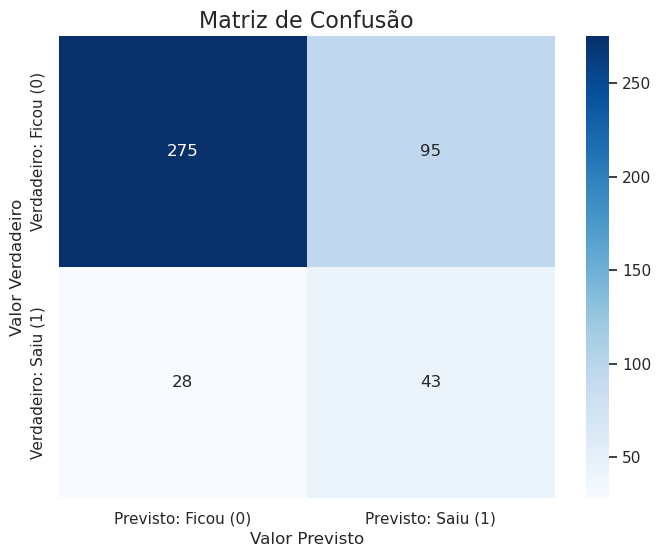

In [96]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)


if 'model_nb' in locals() and not X_test.empty:

    y_pred = model_nb.predict(X_test)

    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print("--- Métricas de Avaliação do Modelo Naive Bayes ---")
    print(f"Acurácia (Accuracy):   {acc * 100:.2f}%")
    print(f"Precisão (Precision): {prec * 100:.2f}%")
    print(f"Recall (Revocação): {rec * 100:.2f}%")
    print(f"F1-Score:             {f1 * 100:.2f}%")

    # Gerar o Relatório de Classificação
   
    print("\n--- Relatório de Classificação Completo ---")
    print(classification_report(y_test, y_pred, target_names=['Ficou (0)', 'Saiu (1)']))

    # Gerar e plotar a Matriz de Confusão
    print("\n--- Matriz de Confusão ---")
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Previsto: Ficou (0)', 'Previsto: Saiu (1)'],
                yticklabels=['Verdadeiro: Ficou (0)', 'Verdadeiro: Saiu (1)'])
    plt.title('Matriz de Confusão', fontsize=16)
    plt.ylabel('Valor Verdadeiro')
    plt.xlabel('Valor Previsto')
    plt.show()

else:
    print("Erro: O modelo 'model_nb' ou os dados 'X_test' não foram encontrados.")
    print("Por favor, execute o bloco de código da etapa (c) novamente.")

# Análise crítica dos resultados

A acurácia não está boa, pois um modelo bastante preguiçoso que chutasse que o funcionário iria ficar na empresa todas as vezes, ainda acertaria 84% das vezes, enquantox' o modelo criado pelo naive-bayes só acerta 72% das vezes.

Recall: Está relativamente ok, o modelo conseguiu identificar 43 dos 71 funcionários que realmente saíram

Precisão: É a maior falha do modelo, pois para conseguir encontrar os 43 funcionários que realmente saíram, o modelo apontou 95 falsos positivos e isso é ruim, pois o RH gastaria recursos para manter as 138 pessoas, sendo que 70% delas não tinham intenção de sair.

O F1-score é uma métrica de avaliação de desempenho para modelos de classificação que combina precisão e recall através do cálculo da média harmônica dessas duas medidas.

O naive-bayes falha pelo principal motivo que ele é considerado ingênuo

- A suposição de que cada feature é independente. Ele vê todas as features de maneira isolada.

Possivelmente, o modelo aprendeu que alguns fatores como salário e estado civil são bastante impactantes para que o funcionário saia ou permaneça na empresa e aprendeu erroneamente que possuir esses fatores aumentam a chance do funcionário sair da empresa e portanto houve uma grande presença de falsos positivos.

No geral, o modelo criado pode ser considerado um modelo alarmista(pode capturar alguns funcionários que realmente planejavam sair da empresa), mas ele ainda tem um desempenho pior do que assumir que ninguém sairá.